In [1]:
import yahoo_fin.stock_info as si
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

startdate = '2021-01-01'
enddate = '2022-04-30'

sp500_list = si.tickers_sp500()
print("Tickers in S&P:", len(sp500_list))


sp500_historical = {}
for ticker in sp500_list:
    sp500_historical[ticker] = si.get_data(ticker, start_date=startdate, end_date=enddate, interval="1d")
    
    
combined = pd.concat(sp500_historical)   
df = pd.DataFrame(combined)

print(df)

Tickers in S&P: 504
                      open        high         low       close    adjclose  \
A   2021-01-04  118.940002  120.089996  117.110001  118.639999  117.816727   
    2021-01-05  118.480003  120.320000  118.070000  119.610001  118.779999   
    2021-01-06  118.690002  123.879997  118.209999  122.889999  122.037224   
    2021-01-07  124.330002  127.480003  124.110001  126.160004  125.284546   
    2021-01-08  126.489998  127.639999  125.849998  127.059998  126.178299   
...                    ...         ...         ...         ...         ...   
ZTS 2022-04-25  180.690002  181.110001  176.440002  180.300003  180.300003   
    2022-04-26  178.960007  179.679993  176.809998  176.970001  176.970001   
    2022-04-27  177.929993  180.229996  177.059998  178.470001  178.470001   
    2022-04-28  179.080002  182.220001  178.179993  181.309998  181.309998   
    2022-04-29  180.000000  181.860001  176.789993  177.250000  177.250000   

                 volume ticker  
A   2021-0

In [2]:
df = df.reset_index(drop=False)
df.drop_duplicates()
print(df.info()) # to find NAN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167982 entries, 0 to 167981
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   level_0   167982 non-null  object        
 1   level_1   167982 non-null  datetime64[ns]
 2   open      167982 non-null  float64       
 3   high      167982 non-null  float64       
 4   low       167982 non-null  float64       
 5   close     167982 non-null  float64       
 6   adjclose  167982 non-null  float64       
 7   volume    167982 non-null  int64         
 8   ticker    167982 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 11.5+ MB
None


In [3]:
#drop unwanted columns
df = df.drop(columns=['high', 'low', 'adjclose', 'volume', 'ticker'])


print(df)



       level_0    level_1        open       close
0            A 2021-01-04  118.940002  118.639999
1            A 2021-01-05  118.480003  119.610001
2            A 2021-01-06  118.690002  122.889999
3            A 2021-01-07  124.330002  126.160004
4            A 2021-01-08  126.489998  127.059998
...        ...        ...         ...         ...
167977     ZTS 2022-04-25  180.690002  180.300003
167978     ZTS 2022-04-26  178.960007  176.970001
167979     ZTS 2022-04-27  177.929993  178.470001
167980     ZTS 2022-04-28  179.080002  181.309998
167981     ZTS 2022-04-29  180.000000  177.250000

[167982 rows x 4 columns]


In [4]:
#rename columns
df = df.rename(columns={'level_0':'ticker', 'level_1':'date'})

print(df)

       ticker       date        open       close
0           A 2021-01-04  118.940002  118.639999
1           A 2021-01-05  118.480003  119.610001
2           A 2021-01-06  118.690002  122.889999
3           A 2021-01-07  124.330002  126.160004
4           A 2021-01-08  126.489998  127.059998
...       ...        ...         ...         ...
167977    ZTS 2022-04-25  180.690002  180.300003
167978    ZTS 2022-04-26  178.960007  176.970001
167979    ZTS 2022-04-27  177.929993  178.470001
167980    ZTS 2022-04-28  179.080002  181.309998
167981    ZTS 2022-04-29  180.000000  177.250000

[167982 rows x 4 columns]


In [5]:
#Append SPX data from CSV
spx = pd.read_csv(r"spx_5_year.csv")
spx.drop_duplicates()
print(spx.info())

#Transform date from mm/dd/yyyy to yyyy-mm-dd
spx['Date'] = pd.to_datetime(spx['Date'])
spx = spx.drop(columns=['High', 'Low', 'Volume'])
spx.insert(loc=0, column='ticker', value='SPX')
spx = spx.rename(columns={'Date':'date', 'Close/Last':'close', 'Open':'open'})
spx = spx.iloc[:, [0,1,3,2]]
mask = (spx['date'] > startdate) & (spx['date'] <= enddate)
spx = spx.loc[mask]
spx = spx.sort_values(by='date')
print(spx)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1259 non-null   object 
 1   Close/Last  1259 non-null   float64
 2   Volume      1259 non-null   object 
 3   Open        1259 non-null   float64
 4   High        1259 non-null   float64
 5   Low         1259 non-null   float64
dtypes: float64(4), object(2)
memory usage: 59.1+ KB
None
    ticker       date     open    close
346    SPX 2021-01-04  3764.61  3700.65
345    SPX 2021-01-05  3698.02  3726.86
344    SPX 2021-01-06  3712.20  3748.14
343    SPX 2021-01-07  3764.71  3803.79
342    SPX 2021-01-08  3815.05  3824.68
..     ...        ...      ...      ...
17     SPX 2022-04-25  4255.34  4296.12
16     SPX 2022-04-26  4278.14  4175.20
15     SPX 2022-04-27  4186.52  4183.96
14     SPX 2022-04-28  4222.58  4287.50
13     SPX 2022-04-29  4253.75  4131.93

[334 rows x 4 columns]


In [6]:
# append spx datafame to df dataframe
df = pd.concat([df, spx], ignore_index=True)

print(df)

       ticker       date         open        close
0           A 2021-01-04   118.940002   118.639999
1           A 2021-01-05   118.480003   119.610001
2           A 2021-01-06   118.690002   122.889999
3           A 2021-01-07   124.330002   126.160004
4           A 2021-01-08   126.489998   127.059998
...       ...        ...          ...          ...
168311    SPX 2022-04-25  4255.340000  4296.120000
168312    SPX 2022-04-26  4278.140000  4175.200000
168313    SPX 2022-04-27  4186.520000  4183.960000
168314    SPX 2022-04-28  4222.580000  4287.500000
168315    SPX 2022-04-29  4253.750000  4131.930000

[168316 rows x 4 columns]


In [7]:
#Add column for previous days close
#df['prev_close'] = df['close'].shift(1)
df = df.iloc[:, [1, 0, 2, 3]]

print(df)

             date ticker         open        close
0      2021-01-04      A   118.940002   118.639999
1      2021-01-05      A   118.480003   119.610001
2      2021-01-06      A   118.690002   122.889999
3      2021-01-07      A   124.330002   126.160004
4      2021-01-08      A   126.489998   127.059998
...           ...    ...          ...          ...
168311 2022-04-25    SPX  4255.340000  4296.120000
168312 2022-04-26    SPX  4278.140000  4175.200000
168313 2022-04-27    SPX  4186.520000  4183.960000
168314 2022-04-28    SPX  4222.580000  4287.500000
168315 2022-04-29    SPX  4253.750000  4131.930000

[168316 rows x 4 columns]


    ticker   %_change
0        A   0.277446
1      AAL  18.422713
2      AAP  26.428127
3     AAPL  18.072191
4     ABBV  37.040497
..     ...        ...
500   ZBRA  -4.171094
501   ZION  31.174549
502    ZTS   6.777108
503    OGN   4.290328
504    CEG  55.815787

[505 rows x 2 columns]
    ticker    %_change
313    MRO  267.551612     ticker   %_change
327   NFLX -64.682746     ticker  %_change
417    SPX  9.757186


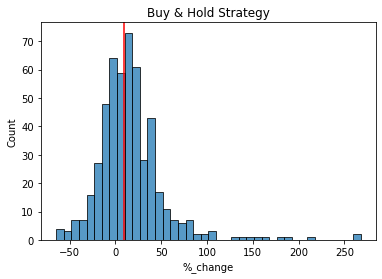

In [8]:
#Find buy & hold result for each company by subtracting close price from open price
buy_price = df.sort_values(df.columns.tolist()).drop_duplicates(subset=['ticker'], keep='first')
#buy_price = df.drop(columns=['date', 'close'])

sell_price = df.sort_values(df.columns.tolist()).drop_duplicates(subset=['ticker'], keep='last')
#sell_price = df.drop(columns=['date', 'open'])



#print(buy_price)
#print(sell_price)

buy_hold = pd.merge(buy_price, sell_price, on='ticker', suffixes=['_buy', '_sell'])
buy_hold = buy_hold.drop(columns=['date_buy', 'close_buy', 'date_sell' , 'open_sell'])
buy_hold['%_change'] = ((buy_hold['close_sell'] - buy_hold['open_buy'])/buy_hold['open_buy']*100)
buy_hold = buy_hold.drop(columns=['open_buy', 'close_sell'])
print(buy_hold)
hold_max = buy_hold.loc[buy_hold['%_change'] == max(buy_hold['%_change'])]
hold_min = buy_hold.loc[buy_hold['%_change'] == min(buy_hold['%_change'])]
hold_spx = buy_hold.loc[buy_hold['ticker'] == 'SPX']

print(hold_max, hold_min, hold_spx)


sns.histplot(buy_hold['%_change']).set(title='Buy & Hold Strategy')
plt.axvline(9.757186, 0, 1, color='r', label='SPX')





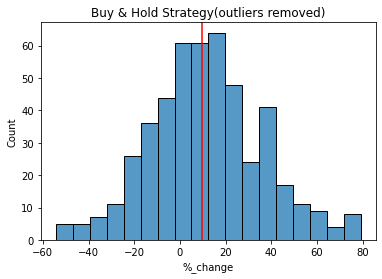

In [20]:
# replace outliers

df_adj = buy_hold
def outliers():
    for x in ['%_change']:
        q75, q25 = np.percentile(df_adj.loc[:,x],[75,25])
        intr_qr = q75-q25
 
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
 
        df_adj.loc[df_adj[x] < min,x] = np.nan
        df_adj.loc[df_adj[x] > max,x] = np.nan
    
outliers()    
sns.histplot(buy_hold['%_change']).set(title='Buy & Hold Strategy(outliers removed)')
plt.axvline(9.757186, 0, 1, color='r', label='SPX')    









    ticker    %_change
312   MRNA  285.393136     ticker    %_change
359   PENN -106.392222     ticker  %_change
417    SPX   0.60564


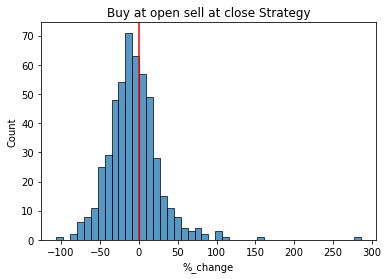

In [15]:
# find the buy at open and sell at close result for each company
acc_buy_pl = df.copy()
acc_buy_pl['difference'] = acc_buy_pl['close'] - acc_buy_pl['open']
acc_buy_pl = acc_buy_pl.groupby(['ticker'])['difference'].sum()
buy_open = pd.merge(buy_price, acc_buy_pl, on='ticker', suffixes=['_buy', '_pl'])
buy_open['%_change'] = (buy_open['difference']/buy_open['open']) * 100
buy_open = buy_open.drop(columns=['date', 'open', 'close', 'difference'])


open_max = buy_open.loc[buy_open['%_change'] == max(buy_open['%_change'])]
open_min = buy_open.loc[buy_open['%_change'] == min(buy_open['%_change'])]
open_spx = buy_open.loc[buy_open['ticker'] == 'SPX']

print(open_max, open_min, open_spx)

sns.histplot(buy_open['%_change']).set(title='Buy at open sell at close Strategy')
plt.axvline(0.60564, 0, 1, color='r', label='SPX')




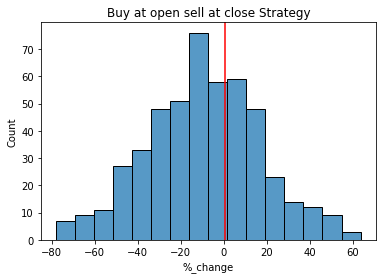

In [16]:
df_adj = buy_open

outliers()
sns.histplot(buy_open['%_change']).set(title='Buy at open sell at close Strategy(outliers removed)')
plt.axvline(0.60564, 0, 1, color='r', label='SPX')


    ticker    %_change
0        A   33.985300
1      AAL -594.051379
2      AAP  110.563111
3     AAPL  -53.651144
4     ABBV  -64.832509
..     ...         ...
500   ZBRA  108.235347
501   ZION -728.604782
502    ZTS   83.305750
503    OGN -766.932380
504    CEG -259.530967

[505 rows x 2 columns]
    ticker    %_change
204   GNRC  166.779608     ticker      %_change
341    NWL -20041.870715     ticker    %_change
417    SPX  106.248362


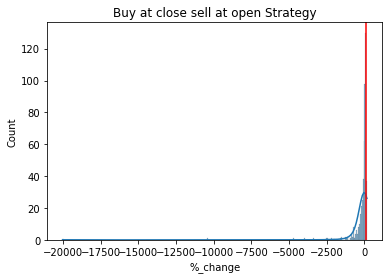

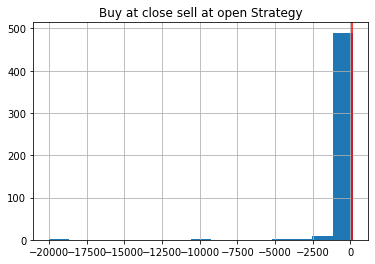

In [17]:
#find buy at close sell at open result for each company
acc_sell_pl = df.copy()

#Add column for previous days close
acc_sell_pl['prev_close'] = acc_sell_pl['close'].shift(1)

acc_sell_pl['difference'] = acc_sell_pl['open'] - acc_sell_pl['prev_close']
acc_sell_pl = acc_sell_pl.groupby(['ticker'])['difference'].sum()
buy_close = pd.merge(buy_price, acc_sell_pl, on='ticker', suffixes=['_buy', '_pl'])
buy_close['%_change'] = (buy_close['difference']/buy_close['close']) * 100
buy_close = buy_close.drop(columns=['date', 'open', 'close', 'difference'])
print(buy_close)

close_max = buy_close.loc[buy_close['%_change'] == max(buy_close['%_change'])]
close_min = buy_close.loc[buy_close['%_change'] == min(buy_close['%_change'])]
close_spx = buy_close.loc[buy_close['ticker'] == 'SPX']

print(close_max, close_min, close_spx)


sns.histplot(buy_close['%_change'], kde = True).set(title='Buy at close sell at open Strategy')
plt.axvline(106.248362, 0, 1, color='r')
buy_close.hist(bins = 15)
plt.title('Buy at close sell at open Strategy')
plt.axvline(106.248362, 0, 1, color='r')



    ticker    %_change
0        A   33.985300
1      AAL         NaN
2      AAP  110.563111
3     AAPL  -53.651144
4     ABBV  -64.832509
..     ...         ...
500   ZBRA  108.235347
501   ZION         NaN
502    ZTS   83.305750
503    OGN         NaN
504    CEG -259.530967

[505 rows x 2 columns]


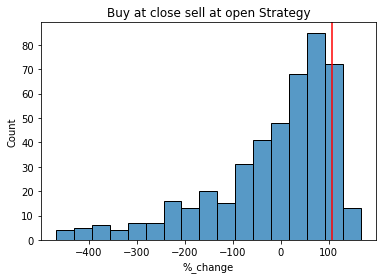

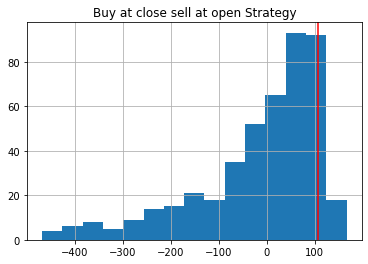

In [19]:
df_adj = buy_close

outliers()

print(buy_close)

sns.histplot(buy_close['%_change']).set(title='Buy at close sell at open Strategy(outliers removed)')
plt.axvline(106.248362, 0, 1, color='r')
buy_close.hist(bins = 15)
plt.title('Buy at close sell at open Strategy(outliers removed)')
plt.axvline(106.248362, 0, 1, color='r')

In [ ]:
#SPX comparison
spx_results = pd.concat([hold_spx, open_spx, close_spx], ignore_index=True)
spx_results.insert(loc=0, column='strategy', value=['buy_and_hold', 'buy_at_open', 'buy_at_close'])
sns.barplot(x=spx_results['strategy'], y=spx_results['%_change']).set(title='S&P 500 index performance')

print(spx_results)


